**Notebook: code to locally save the dataset**
 - T1 and T2, all the slices 
 - saved 5-fold of noise-augmented examples

In [ ]:
import utils as ut
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
ds_folds = ut.siamese_noise_dataset_fold_range(n_splits=5, noise_size=6)
ds_folds

Total dataset size: 3150
Number of T1 images: 1476
Number of T2 images: 1674


[DatasetDict({
     train: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 2016
     })
     valid: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 504
     })
     test: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 630
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 2016
     })
     valid: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 504
     })
     test: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 630
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 2016
     })
     valid: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 504
     })
     tes

In [3]:
with open('ds_folds_5.pkl', 'wb') as file:
    pickle.dump(ds_folds, file)


In [4]:
with open('ds_folds_5.pkl', 'rb') as file:
    loaded_folds = pickle.load(file)
loaded_folds

[DatasetDict({
     train: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 2016
     })
     valid: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 504
     })
     test: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 630
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 2016
     })
     valid: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 504
     })
     test: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 630
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 2016
     })
     valid: Dataset({
         features: ['slice1', 'slice2', 'label', 'image_type'],
         num_rows: 504
     })
     tes

Number of T1 in test: 296
Number of T2 in test: 334

In [5]:
loaded_folds[0]['test']['image_type'].count(0), loaded_folds[0]['test']['image_type'].count(1)

(296, 334)

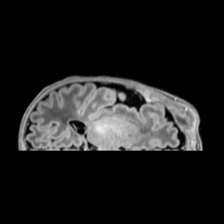

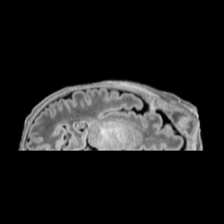

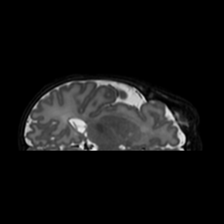

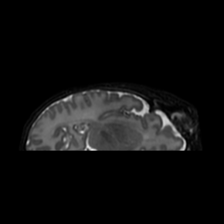

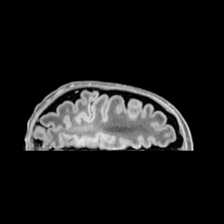

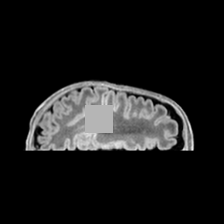

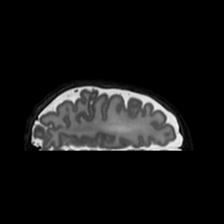

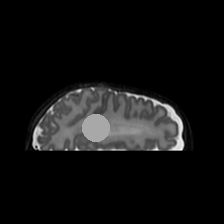

In [6]:
pairs = []
for i in range(4):
    display(im1:=loaded_folds[0]['train'][i]['slice1'])
    display(im2:=loaded_folds[0]['train'][i]['slice2'])
    pairs.append((im1, im2))

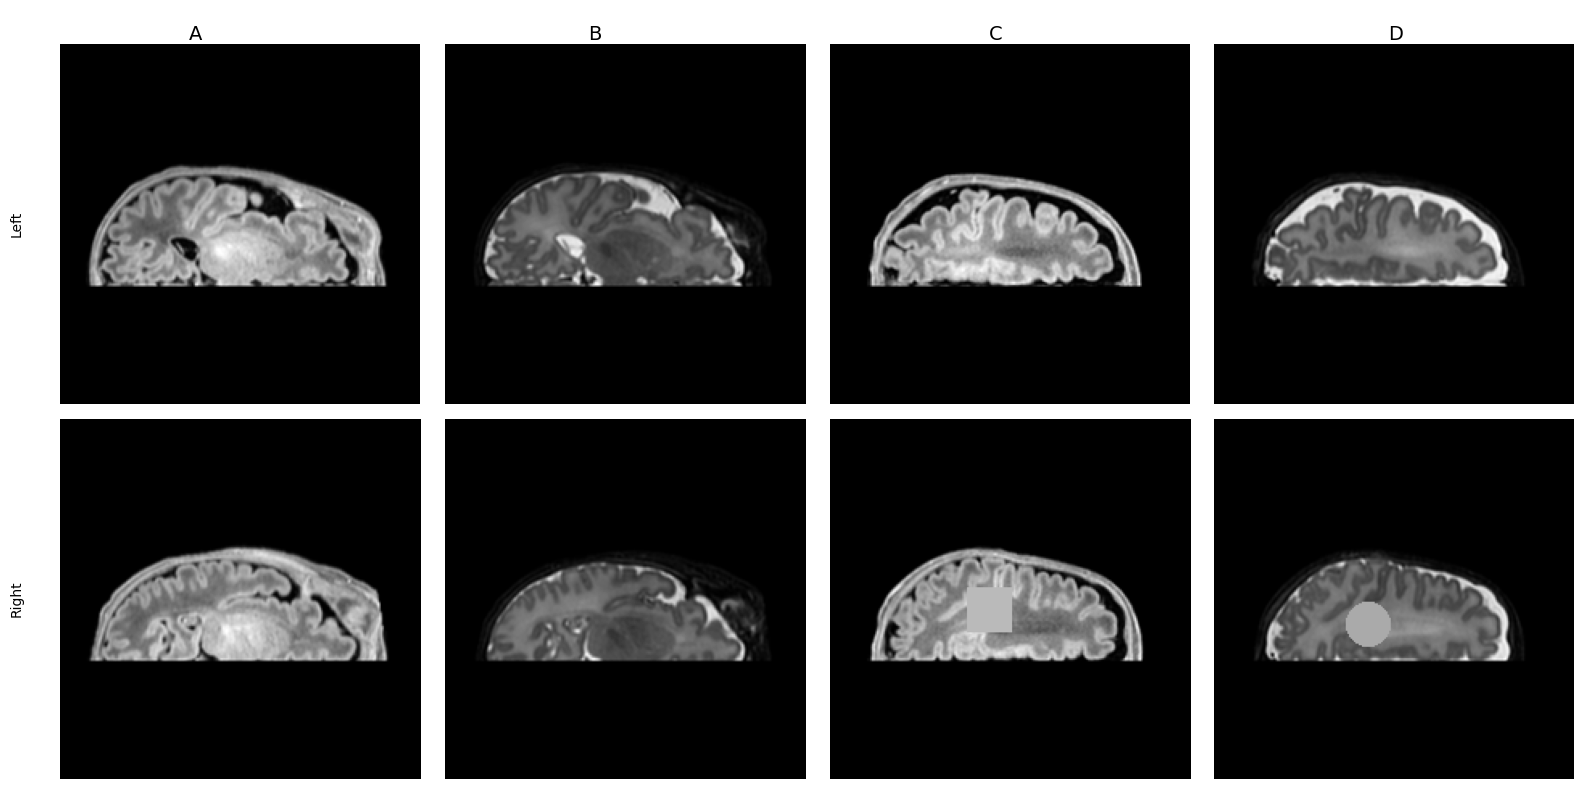

In [7]:
def create_brain_halves_grid(image_pairs, output_file='brain_halves_grid.png'):
    # Set up the plot
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle(' ', fontsize=16)

    # Remove space between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, (left_img, right_img) in enumerate(image_pairs):
        # Plot left half
        axs[0, i].imshow(np.array(left_img), cmap='gray')
        axs[0, i].axis('off')

        # Plot right half
        axs[1, i].imshow(np.array(right_img), cmap='gray')
        axs[1, i].axis('off')

        # Add column label
        if i == 0:
            axs[0, i].text(-0.1, 0.5, 'Left', va='center', ha='right', transform=axs[0, i].transAxes, rotation=90)
            axs[1, i].text(-0.1, 0.5, 'Right', va='center', ha='right', transform=axs[1, i].transAxes, rotation=90)

        # Add A, B, C, D labels
        label = chr(65 + i)  # 65 is ASCII for 'A'
        fig.text((i + 0.5) / 4, 0.95, label, ha='center', va='center', fontsize=14)

    plt.tight_layout()
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close()

create_brain_halves_grid(pairs)

In [8]:
# subdataset tests

# ims = []
# for i in range(20):
#     im1 = ds_folds[0]['train'][i]['slice1']
#     im2 = ds_folds[0]['train'][i]['slice2']
#     lbl = ds_folds[0]['train'][i]['label']
#     typ = ds_folds[0]['train'][i]['image_type']
#     if lbl == 0 and typ == 0:
#         ims.append(im1, im2)
#     if lbl == 0 and typ == 0:
#         ims.append(im1, im2)
#     if lbl == 0 and typ == 0:
#         ims.append(im1, im2)
#     if lbl == 0 and typ == 0:
#         ims.append(im1, im2)